# Layer Discretization Example

This notebook demonstrates how to use layer discretization options in soil profiles. Discretization is useful for numerical computations where layers need to be split into smaller sublayers with different resolutions.

In [1]:
from simplesoilprofile import SoilLayer, SoilProfile, plot_profile
from simplesoilprofile.models.discretization import LayerDiscretization, DiscretizationType

import matplotlib.pyplot as plt
from shapely.geometry import Point

## Create Soil Layers with Different Discretization Schemes

We'll create a profile with three layers using different discretization approaches:

In [ ]:
log_both = LayerDiscretization(
        type=DiscretizationType.LOG_BOTH,
        num_sublayers=11,
        log_density=3
    )
log_top = LayerDiscretization(
        type=DiscretizationType.LOG_TOP,
        num_sublayers=8,
        log_density=2.0
    )

even = LayerDiscretization(
        type=DiscretizationType.EVEN,
        num_sublayers=5
    )

In [3]:
# Topsoil with even discretization
topsoil = SoilLayer(
    name="Topsoil",
    theta_res=0.02,
    theta_sat=0.4,
    alpha=0.02,
    n=1.5,
    k_sat=10.0,
    texture_class="sandy loam",
    clay_content=10.0,
    silt_content=20.0,
    sand_content=70.0,
    discretization=even
)

# Subsoil with logarithmic discretization at top (finer at surface)
subsoil = SoilLayer(
    name="Subsoil",
    theta_res=0.05,
    theta_sat=0.45,
    alpha=0.01,
    n=1.3,
    k_sat=5.0,
    texture_class="clay loam",
    clay_content=30.0,
    silt_content=35.0,
    sand_content=35.0,
    discretization=log_top
)

# Bedrock with logarithmic discretization at both ends
bedrock = SoilLayer(
    name="Bedrock",
    theta_res=0.1,
    theta_sat=0.3,
    alpha=0.005,
    n=1.2,
    k_sat=1.0,
    texture_class="rock",
    clay_content=5.0,
    silt_content=10.0,
    sand_content=85.0,
    discretization=log_both
)

## Create and Plot Profile

Create a profile combining these layers and visualize with sublayer boundaries:

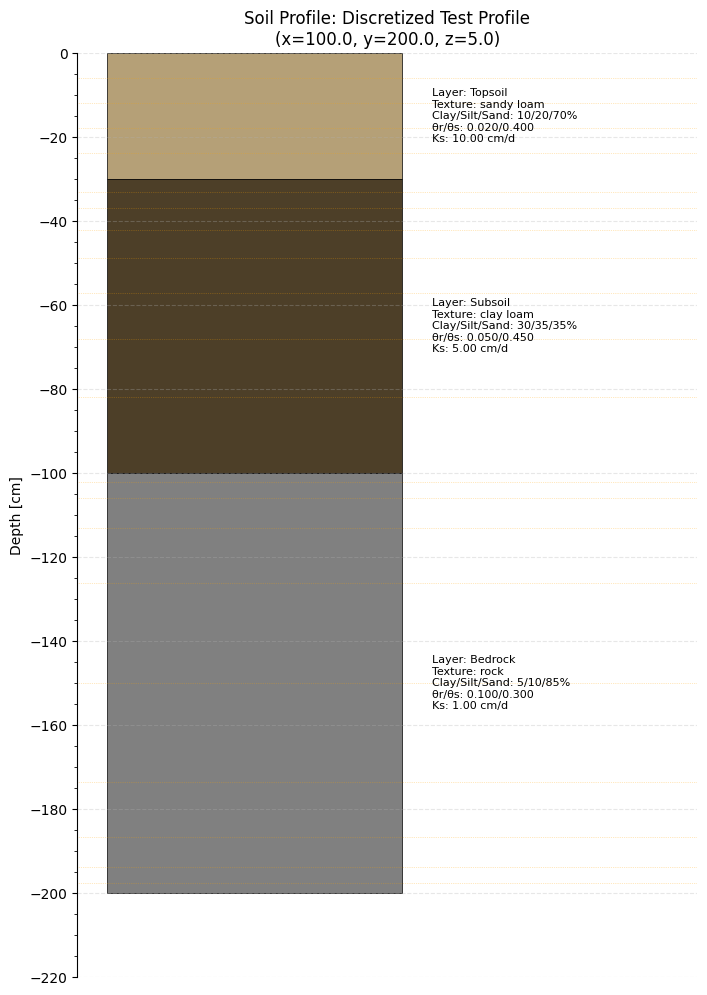

In [4]:
# Create soil profile
profile = SoilProfile(
    name="Discretized Test Profile",
    layers=[topsoil, subsoil, bedrock],
    layer_depths={
        0: (0, 30),     # Topsoil from 0-30 cm
        1: (30, 100),   # Subsoil from 30-100 cm
        2: (100, 200),  # Bedrock from 100-200 cm
    },
    location=Point(100.0, 200.0),
    elevation=5.0,
)

# Create plot showing sublayer boundaries
fig, ax = plt.subplots(figsize=(8, 12))
plot_profile(profile, ax=ax, show_properties=True, show_sublayers=True)
plt.show()

## Examine Sublayer Boundaries

Let's print out the computed sublayer boundaries for each layer:

In [5]:
boundaries = profile.get_sublayer_boundaries()

for layer_idx, depths in boundaries.items():
    layer = profile.layers[layer_idx]
    print(f"\n{layer.name} sublayer boundaries [cm]:")
    
    # Print depths and thicknesses
    print("Depths:", [f"{d:.1f}" for d in depths])
    print("Thicknesses:", [f"{depths[i+1]-depths[i]:.1f}" for i in range(len(depths)-1)])


Topsoil sublayer boundaries [cm]:
Depths: ['0.0', '6.0', '12.0', '18.0', '24.0', '30.0']
Thicknesses: ['6.0', '6.0', '6.0', '6.0', '6.0']

Subsoil sublayer boundaries [cm]:
Depths: ['30.0', '33.1', '37.1', '42.2', '48.8', '57.3', '68.1', '82.1', '100.0']
Thicknesses: ['3.1', '4.0', '5.1', '6.6', '8.5', '10.9', '13.9', '17.9']

Bedrock sublayer boundaries [cm]:
Depths: ['100.0', '102.2', '106.1', '113.2', '126.3', '150.0', '173.7', '186.8', '193.9', '197.8', '200.0']
Thicknesses: ['2.2', '3.9', '7.2', '13.0', '23.7', '23.7', '13.0', '7.2', '3.9', '2.2']
